# Homework 4

In [2]:
# import libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
a_control = 108
b_control = 35
a_treatment = 58
b_treatment = 65

# create posterior distribution
posterior_control = stats.beta(a_control, b_control)
posterior_treatment = stats.beta(a_treatment, b_treatment)

In [9]:
dataset = {
    "Di Rienzo 2014": {"control": [9, 15], "treatment": [20, 23]},
    "Galli 1994": {"control": [11, 18], "treatment": [10, 16]},
    "Kaufman 1974": {"control": [4, 10], "treatment": [13, 16]},
    "Qin 2014": {"control": [21, 39], "treatment": [35, 45]},
    "Sanchez 2012": {"control": [12, 29], "treatment": [22, 31]},
    "Silny 2006": {"control": [0, 10], "treatment": [7, 10]}
}

For Di Rienzo 2014, the average p-value of control group is 0.11 of treatment group is 0.00
For Galli 1994, the average p-value of control group is 0.11 of treatment group is 0.10
For Kaufman 1974, the average p-value of control group is 0.01 of treatment group is 0.00
For Qin 2014, the average p-value of control group is 0.00 of treatment group is 0.00
For Sanchez 2012, the average p-value of control group is 0.00 of treatment group is 0.00


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


For Silny 2006, the average p-value of control group is 0.00 of treatment group is 0.06


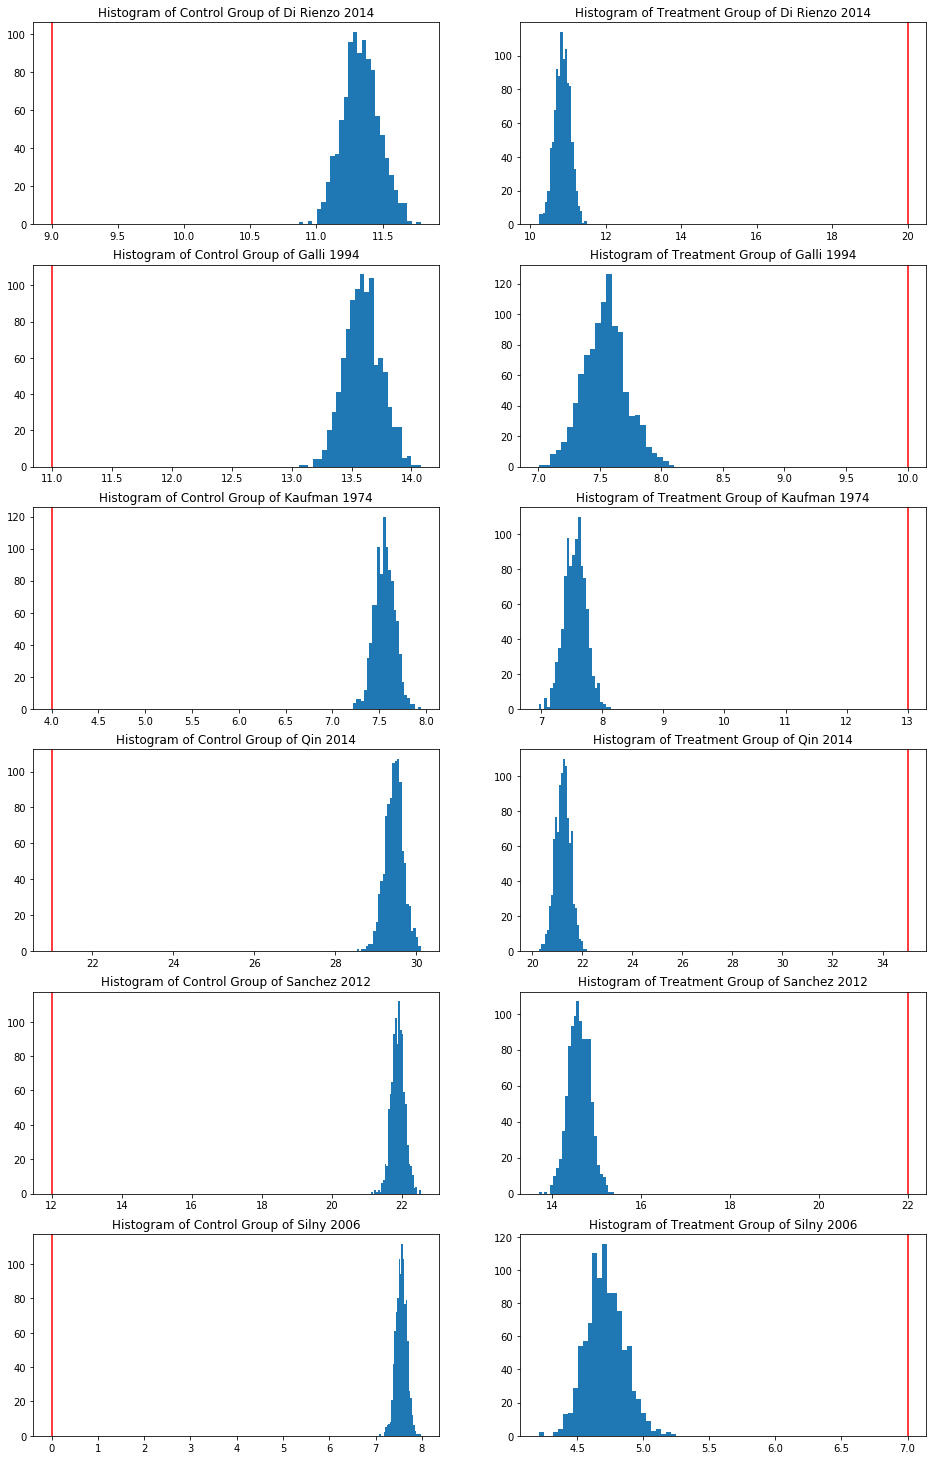

In [30]:
count = 1
plt.rcParams['figure.figsize'] = [16, 26]

for key, data in dataset.items():

    s_control = data["control"][0]
    n_control = data["control"][1]
    s_treatment = data["treatment"][0]
    n_treatment = data["treatment"][1]
    rvs_control = []
    rvs_treatment = []
    p_value_control = []
    p_value_treatment = []
    for i in range(1000):
        pc_sample = sum(posterior_control.rvs(size=n_control))
        z_score = (pc_sample - s_control) / (s_control*(n_control-s_control) / n_control)**0.5
        p_value_control.append(stats.norm.sf(abs(z_score)))
        rvs_control.append(pc_sample)
        
        pt_sample = sum(posterior_treatment.rvs(size=n_treatment))
        z_score = (pt_sample - s_treatment) / (s_treatment*(n_treatment-s_treatment) / n_treatment)**0.5
        p_value_treatment.append(stats.norm.sf(abs(z_score)))
        rvs_treatment.append(pt_sample)
    
    p_value_control = sum(p_value_control)/len(p_value_control)
    p_value_treatment = sum(p_value_treatment)/len(p_value_treatment)
    print ("For {:s}, the average p-value of control group is {:.2f} of treatment group is {:.2f}"
           .format(key, p_value_control, p_value_treatment))

    plt.subplot(6, 2, count)
    plt.hist(rvs_control, bins='auto')  # histogram showing the control group posterior sample distribution
    plt.axvline(s_control, color='r')  # vertical line showing the actual success of the control group
    plt.title("Histogram of Control Group of {:s}".format(key))
    count +=1
    
    plt.subplot(6, 2, count)
    plt.hist(rvs_treatment, bins='auto')  # histogram showing the treatment group posterior sample distribution
    plt.axvline(s_treatment, color='r')  # vertical line showing the actual success of the treatment group
    plt.title("Histogram of Treatment Group of {:s}".format(key))
    count +=1
    
plt.show()